### Emergency call centres analysis 

This analysis is focused on analysing the data collected from emergency call centres in the USA, more specifically from EMS (Montgomery County, Philadelphia).

The data set is obtained from [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert).

### Dataset explanation:

It contains 9 columns, as follows:  

* lat(Latitude) : String variable, Latitude
* lng(Longitude): String variable, Longitude
* desc(Description of Emergency): String variable, Description of the Emergency Call
* zip(zipcode): String variable, Zipcode
* title(Title of Emergency): String variable, Title
* timeStamp(Date and time of the call): String variable, YYYY-MM-DD HH:MM:SS
* twp(Towns): String variable, Township
* addr(General Address): String variable, Address
* e(Index column, always 1): String variable, Dummy variable (always 1)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

### Exploring the data to check for any null values. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


###  What are the top 5 zipcodes for emergency calls?

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

###  What are the top 5 townships (twp) for emergency calls? 

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Adding a column to categorise the reason of each call.

In [7]:
# Grabbing from title to a new column 'Reason' 
#to categorical column of three categories 

#Based on the title column, adding the first item in the list [0]
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Checking the data after adding the colum**

In [9]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### What is the most common Reason for the calls based off of this new column?



In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [11]:
fire_df = df[df['Reason'] == 'Fire']


In [12]:
traffic_df = df[df['Reason'] == 'Traffic']


In [13]:
t_and_fire_df = pd.concat([fire_df, traffic_df])

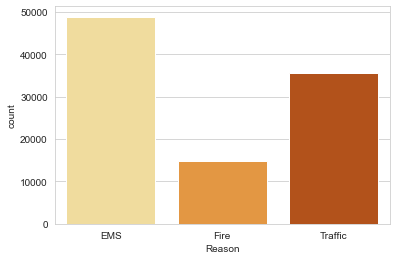

In [14]:
sns.countplot(x='Reason',data=df,palette='YlOrBr');

In [15]:
# sns.countplot(x='Reason', data=t_and_fire_df,palette='YlOrBr');

In [16]:
type(df['timeStamp'].iloc[0])

str

**Converting the date string datatype to Date and time type**

In [17]:
# reseting the column to timestamp object using panda

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [19]:
time.year

2015

In [20]:
time.dayofweek

3

In [21]:
# Lambda function to take the time and return hour, month and day of week attributes

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [22]:
# Checking the dataframe after adding the hour, day and month 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [23]:
# Changing the categorical day of week to string using dict

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# using the map function to mao it to the dataframe 
df['Day of Week'] = df['Day of Week'].map(dmap)

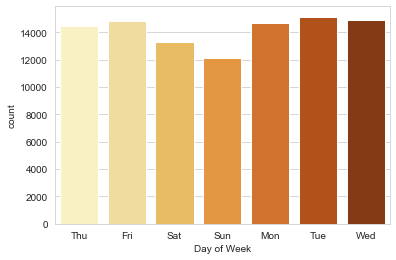

In [24]:
sns.countplot(x='Day of Week',data=df,palette='YlOrBr');

# # To relocate the legend
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

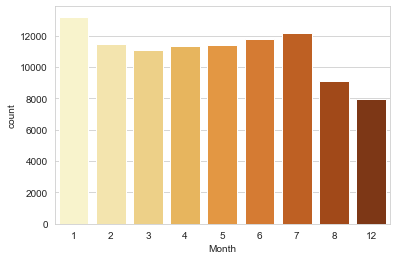

In [25]:
sns.countplot(x='Month',data=df,palette='YlOrBr');

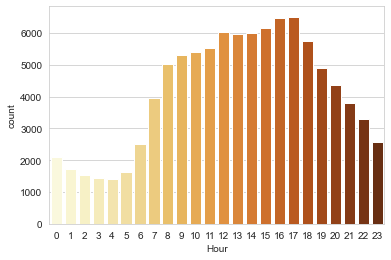

In [26]:
sns.countplot(x='Hour',data=df,palette='YlOrBr');

### Reason for call per category per week 

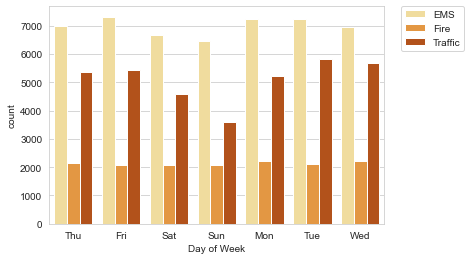

In [27]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

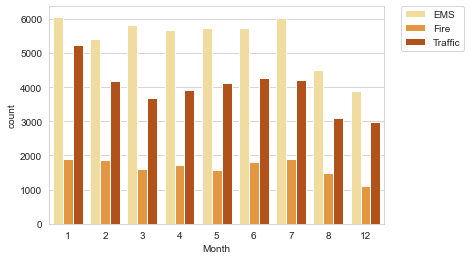

In [28]:
sns.countplot(x='Month',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [29]:
#As showing above we have some missing months in the bar chart
# Aggregating the count by the latitude value 
#by assuming that we received a call if we have the location for it

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


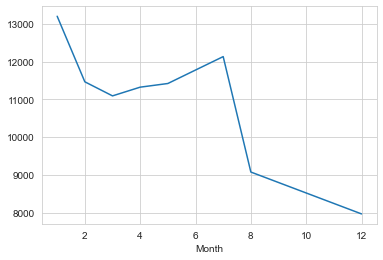

In [30]:
# Line plot cover all the 12 month for more insight 

byMonth['twp'].plot();

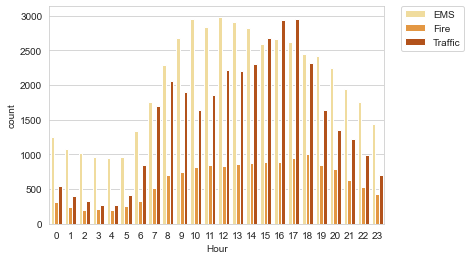

In [31]:
sns.countplot(x='Hour',data=df,hue='Reason',palette='YlOrBr')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [34]:

by_week = df.groupby('Day of Week').count()
by_week.head()
by_week[''twp''].plot();

SyntaxError: invalid syntax. Perhaps you forgot a comma? (Temp/ipykernel_17212/4161818699.py, line 3)

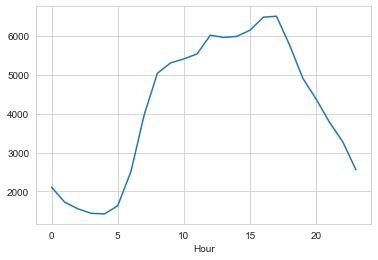

In [35]:
by_hour = df.groupby('Hour').count()
by_hour.head()
by_hour['twp'].plot();

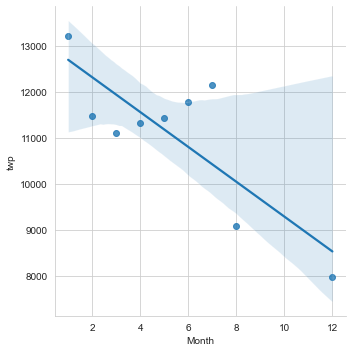

In [36]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index());

In [37]:
by_month = byMonth.loc[:, 'lat']

by_month_df = pd.DataFrame(by_month)


In [38]:
# sns.lineplot(data=may_flights, x="year", y="passengers")

by_month_df

,lat
Month,
1,13205
2,11467
3,11101
4,11326
5,11423
6,11786
7,12137
8,9078
12,7969


In [33]:
# Group the data by hour
date_grouped_data = df.groupby(['Day of Week', 'Hour']).count()['title'].reset_index()

In [ ]:
pd.set_option('display.MAX_COLUMNS', None)
call_data_date = pd.pivot_table(data=date_grouped_data, values='title', index='Day of Week', columns='Hour').fillna(0)

In [ ]:
# Plot the Number of calls recieved per hour
call_data_date.plot(kind='box')
plt.title("Hour Count Distribution")
plt.xlabel("Number of calls per hour")
plt.show()